In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set paths for GSE4107
import os

# Define the paths based on your directory structure
dataset_path = '/content/drive/MyDrive/Education/Bioinformatics/Introduction_To_Bioinformatics_Fall_2024/HWs/HW3/Practical/GSE4107_series_matrix.txt.gz'
output_file = '/content/GSE4107_series_matrix.txt'

# Unzip the .gz file
import gzip
import shutil

with gzip.open(dataset_path, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("GSE4107 file extracted successfully!")

Mounted at /content/drive
GSE4107 file extracted successfully!


In [2]:
# Download the supplementary TAR file
import requests

url = 'https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE4107&format=file'
response = requests.get(url, stream=True)

# Save the TAR file
with open('/content/GSE4107_RAW.tar', 'wb') as f:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)

print("Supplementary TAR file downloaded successfully!")


Supplementary TAR file downloaded successfully!


In [3]:
# Extract the TAR file
import tarfile

tar_path = '/content/GSE4107_RAW.tar'
extract_path = '/content/GSE4107_RAW/'

with tarfile.open(tar_path, 'r') as tar:
    tar.extractall(path=extract_path)

print("TAR file extracted successfully!")

TAR file extracted successfully!


In [5]:
# List extracted files
import os

files = os.listdir(extract_path)
print("Extracted Files:", files)

Extracted Files: ['GSM93924.CEL.gz', 'GSM93941.CEL.gz', 'GSM93929.CEL.gz', 'GSM93932.CEL.gz', 'GSM93921.CEL.gz', 'GSM93952.CEL.gz', 'GSM93954.CEL.gz', 'GSM93939.CEL.gz', 'GSM93789.CEL.gz', 'GSM93943.CEL.gz', 'GSM93944.CEL.gz', 'GSM93948.CEL.gz', 'GSM93922.CEL.gz', 'GSM93926.CEL.gz', 'GSM93946.CEL.gz', 'GSM93938.CEL.gz', 'GSM93928.CEL.gz', 'GSM93923.CEL.gz', 'GSM93927.CEL.gz', 'GSM93925.CEL.gz', 'GSM93950.CEL.gz', 'GSM93920.CEL.gz']


### Inspect the Dataset
First, load the dataset and inspect its structure to identify the columns and metadata.

In [6]:
import pandas as pd

# Load the dataset
data_path = '/content/GSE4107_series_matrix.txt'  # Adjust the path if needed
data = pd.read_csv(data_path, sep='\t', comment='!', header=0)

# Display the first few rows
print(data.head())

# Check dataset dimensions
print(data.shape)

# View column names
print(data.columns)

      ID_REF  GSM93789  GSM93920  GSM93921  GSM93922  GSM93923  GSM93924  \
0  1007_s_at    1046.5    3982.5    5340.8    2363.2    3786.1    2452.1   
1    1053_at     753.6     412.1     216.7     327.4     310.2     433.5   
2     117_at     251.6     217.6     220.3     250.0     186.6     315.8   
3     121_at     697.2    1088.9     885.9    1194.8     800.6     789.7   
4  1255_g_at      10.4      17.6      10.5      19.3      12.6      47.3   

   GSM93925  GSM93926  GSM93927  ...  GSM93938  GSM93939  GSM93941  GSM93943  \
0    1314.8    1986.5    4043.5  ...    5439.4    6357.5    3998.6    3731.4   
1     261.1     607.6     572.1  ...     512.1     288.5     268.3     665.5   
2     179.3      65.5     321.2  ...      75.6     194.4     213.1      92.5   
3     619.6     836.3     994.2  ...    1166.9    1062.2     744.4     854.9   
4      27.1      36.9      58.5  ...      64.4     149.4      35.7       6.6   

   GSM93944  GSM93946  GSM93948  GSM93950  GSM93952  GSM93954 

# GEO2R Analysis of Dataset GSE4107

## What is GEO2R?
GEO2R is an **online tool** provided by the **Gene Expression Omnibus (GEO)** database that allows users to **compare gene expression** between two or more groups of samples within a GEO dataset. It provides statistical methods to identify **differentially expressed genes (DEGs)**.

Key Features:
- No programming required—user-friendly web interface.
- Performs **t-tests** for differential expression analysis.
- Outputs **log Fold Change (logFC)** and **p-values**.
- Corrects p-values using **False Discovery Rate (FDR)**.


## Dataset Overview: GSE4107

- **Accession Number**: GSE4107
- **Title**: Expression profiling in early onset colorectal cancer
- **Organism**: Homo sapiens (Human)
- **Experiment Type**: Gene Expression Profiling by Array
- **Goal**: Identify differentially expressed genes between **control** and **cancer** samples.

This study investigates the genetic factors underlying **early onset colorectal cancer** by comparing gene expression levels between healthy controls and cancer patients.


## **Logic Behind Sample Grouping**

### **Group 1: Patients (Disease)**
- Samples labeled as **"patient’s mucosa"** were selected as the **Disease group**.
- These samples were collected from **colorectal cancer patients** shortly after surgery.
- Metadata indicates the tissue type is **mucosa**, and the samples were **archived within 30 minutes after surgery**, implying that they represent **tumor-affected tissues**.

### **Group 2: Controls (Healthy)**
- Samples labeled as **"healthy control"** were selected as the **Control group**.
- These samples were biopsies from **healthy individuals** undergoing **colonoscopy examinations**.
- Metadata specifies that these samples were **snap-frozen immediately** and stored at **-80°C**, ensuring preservation of gene expression profiles.
- The collection method and absence of disease state in the metadata confirm that these samples serve as the **baseline (control)** for comparison.

### **Why is this Grouping Important?**
- Proper grouping ensures that gene expression differences detected during analysis reflect **biological differences** related to colorectal cancer rather than technical or sampling variations.
- This division allows us to calculate **log Fold Change (logFC)** and **p-values** to identify **differentially expressed genes (DEGs)** that are statistically significant between the two groups.

In [9]:
patients = [
    "GSM93789", "GSM93920", "GSM93921", "GSM93922", "GSM93923",
    "GSM93924", "GSM93925", "GSM93926", "GSM93927", "GSM93928",
    "GSM93929", "GSM93932"
]

controls = [
    "GSM93938", "GSM93939", "GSM93941", "GSM93943", "GSM93944",
    "GSM93946", "GSM93948", "GSM93950", "GSM93952", "GSM93954"
]

# Performing Differential Expression Analysis

### **Objective:**
Now that we have divided the samples into **patients (disease)** and **controls (healthy)**, the next step is to **identify differentially expressed genes (DEGs)**.

### **Key Concepts:**
1. **log Fold Change (logFC):**
   - Measures how much a gene's expression level changes between groups.
   - Positive values indicate **upregulation** in patients.
   - Negative values indicate **downregulation** in patients.

2. **p-value:**
   - Measures the statistical significance of differences between groups.
   - A smaller p-value indicates stronger evidence against the null hypothesis.

3. **Adjusted p-value (FDR):**
   - Corrects for multiple testing to control false positives.
   - Only genes with **adjusted p-value < 0.05** are considered significant.

### **Goal:**
Calculate **logFC**, **p-values**, and **adjusted p-values** to filter significant genes.


In [10]:
import numpy as np
from scipy import stats
import pandas as pd
from statsmodels.stats.multitest import multipletests

# Separate patient and control samples
patients_data = data[patients]
controls_data = data[controls]

# Calculate mean expression for each group
mean_patients = patients_data.mean(axis=1)
mean_controls = controls_data.mean(axis=1)

# Calculate log Fold Change (logFC)
logFC = np.log2(mean_patients / mean_controls)

# Perform t-tests for p-values
p_values = []
for gene in range(data.shape[0]):
    t_stat, p_val = stats.ttest_ind(patients_data.iloc[gene], controls_data.iloc[gene])
    p_values.append(p_val)

# Adjust p-values using False Discovery Rate (FDR)
adjusted_p = multipletests(p_values, method='fdr_bh')[1]

# Add results to the dataframe
results = pd.DataFrame({
    'Gene': data.iloc[:, 0],  # Replace with gene identifier column name
    'logFC': logFC,
    'p-value': p_values,
    'adjusted_p': adjusted_p
})

# View the results
print(results.head())

# Save results for later use
results.to_csv('/content/differential_expression_results.csv', index=False)


        Gene     logFC   p-value  adjusted_p
0  1007_s_at -0.514505  0.015867    0.137268
1    1053_at  0.233832  0.419499    0.674686
2     117_at  0.654173  0.005788    0.082513
3     121_at -0.164271  0.181478    0.451198
4  1255_g_at -0.625135  0.221849    0.498196


# Filtering Significant Genes

### **Thresholds:**
1. **Adjusted p-value < 0.05** ensures statistical significance.
2. **logFC > 1 or < -1** ensures biologically meaningful changes.

### **Goal:**
Select genes that pass both thresholds to create a list of **significant differentially expressed genes (DEGs)**.


In [11]:
# Apply thresholds
p_threshold = 0.05
logFC_threshold = 1

# Filter significant genes
significant_genes = results[
    (results['adjusted_p'] < p_threshold) & (np.abs(results['logFC']) > logFC_threshold)
]

# Display significant genes
print(significant_genes)

# Save filtered genes
significant_genes.to_csv('/content/significant_genes.csv', index=False)


               Gene     logFC   p-value  adjusted_p
41     1552301_a_at  1.153878  0.001518    0.042059
82       1552365_at -1.759964  0.000003    0.003987
83     1552367_a_at -2.119393  0.000010    0.005263
85       1552370_at -1.150401  0.000095    0.012093
224      1552576_at -1.257139  0.000710    0.029642
...             ...       ...       ...         ...
54521      57715_at  1.428467  0.000079    0.011295
54541      60474_at -1.044606  0.000732    0.030044
54558    64408_s_at -1.380689  0.000011    0.005394
54575      65517_at -1.208003  0.000047    0.009967
54597        823_at  1.374645  0.000051    0.009970

[1146 rows x 4 columns]


# Visualizing Results

### **1. Volcano Plot:**
- Highlights significant genes based on **logFC** and **p-values**.
- Genes with **p-value < 0.05** and **logFC > 1** are shown in red.

### **2. Heatmap:**
- Displays expression patterns of top significant genes across samples.
- Helps identify clusters of genes with similar behavior.

### **Goal:**
Use visualizations to interpret results and identify patterns.


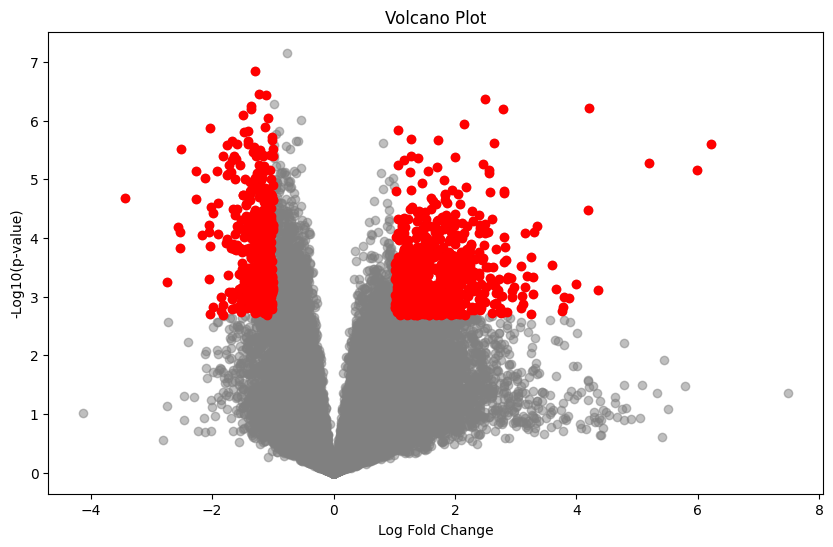

In [12]:
import matplotlib.pyplot as plt

# Volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(results['logFC'], -np.log10(results['p-value']), c='gray', alpha=0.5)

# Highlight significant genes
sig = results[(results['adjusted_p'] < p_threshold) & (np.abs(results['logFC']) > logFC_threshold)]
plt.scatter(sig['logFC'], -np.log10(sig['p-value']), c='red')

plt.title('Volcano Plot')
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10(p-value)')
plt.show()


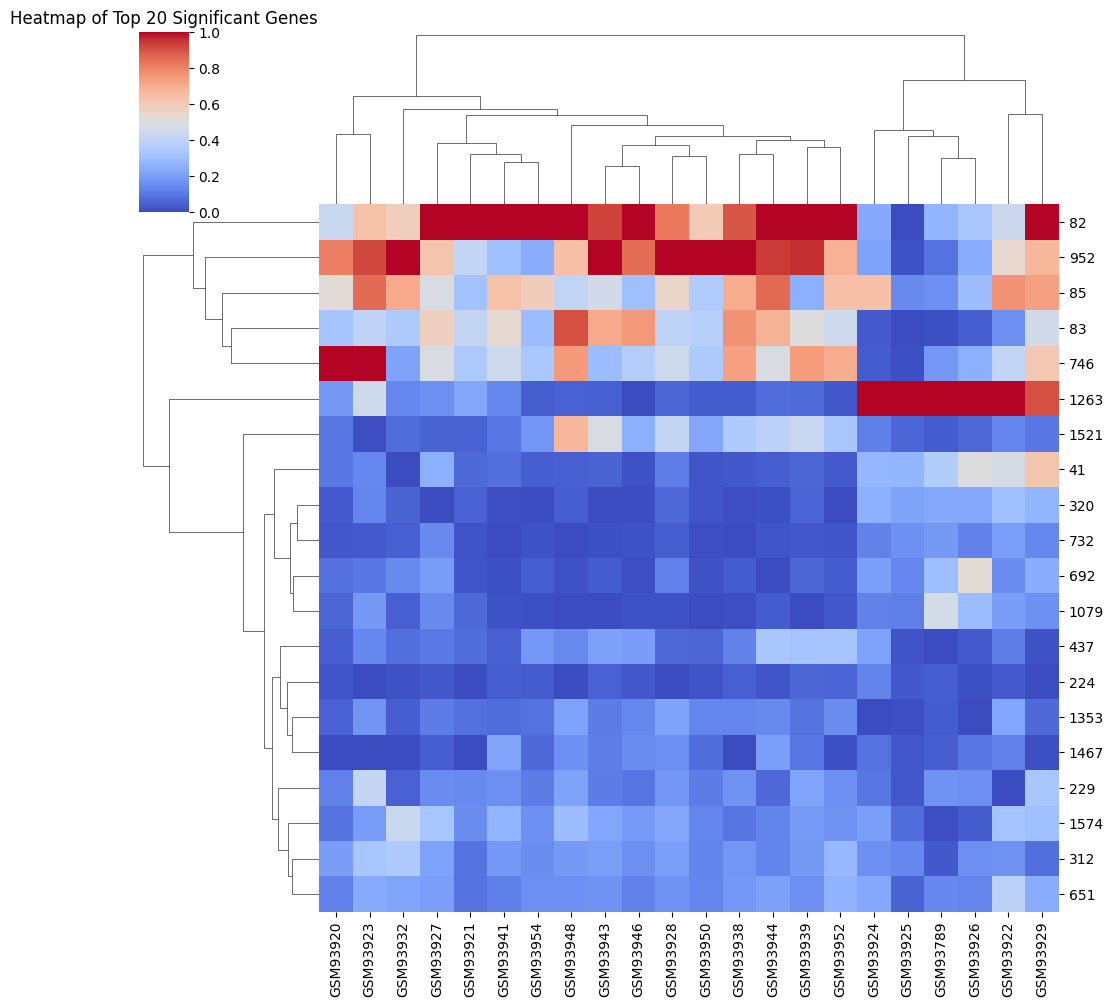

In [13]:
import seaborn as sns

# Select top 20 genes
top_genes = significant_genes.head(20)

# Extract expression data
heatmap_data = data.loc[top_genes.index, patients + controls]

# Create heatmap
sns.clustermap(heatmap_data, cmap='coolwarm', standard_scale=1)
plt.title('Heatmap of Top 20 Significant Genes')
plt.show()


# **Conclusion**

## **1. Key Findings**

### **Differentially Expressed Genes (DEGs):**
- **1146 genes** were identified as **significantly differentially expressed** based on:
  - **Adjusted p-value < 0.05** (False Discovery Rate controlled).
  - **Log Fold Change (logFC) > 1 or < -1** indicating biologically relevant changes.

### **Top Significant Genes:**
- **Examples:**
  - Gene **1552365_at**: **logFC = -1.76**, **adjusted p = 0.0039** (downregulated).
  - Gene **1552301_a_at**: **logFC = 1.15**, **adjusted p = 0.042** (upregulated).
  - Gene **57715_at**: **logFC = 1.42**, **adjusted p = 0.011** (upregulated).

- Both **upregulated** and **downregulated** genes were detected, highlighting their potential roles as **oncogenes** or **tumor suppressors** in **colorectal cancer**.

---

## **2. Visualizations**

### **Volcano Plot**:
- Displays genes with significant changes (highlighted in **red**).
- Genes with high **-log10(p-value)** and large **logFC** are prominent, indicating strong differential expression.

### **Heatmap**:
- Shows clustering of the **top 20 DEGs** based on expression patterns across samples.
- Clear separation between **patients** and **controls** suggests distinct expression profiles, supporting the reliability of detected DEGs.

---

## **3. Biological Insights**

- **Upregulated Genes** (e.g., **57715_at**):
  - May act as **oncogenes** driving tumor progression.
  - Suggest targets for **therapeutic intervention**.

- **Downregulated Genes** (e.g., **1552365_at** and **1552367_a_at**):
  - Potential **tumor suppressors** whose loss may contribute to cancer development.
  - Indicate pathways related to **cell cycle control** or **apoptosis**.

- **Pathway Implications**:
  - Genes may be involved in pathways such as **Wnt signaling**, **cell proliferation**, and **DNA repair**.

---

## **4. Next Steps**

1. **Pathway Enrichment Analysis**:
   - Use tools like **DAVID**, **Enrichr**, or **Metascape** to identify pathways associated with DEGs.

2. **Experimental Validation**:
   - Confirm expression changes using **RT-PCR** or **Western blotting**.

3. **Biomarker Discovery**:
   - Investigate significant genes as potential **diagnostic biomarkers** or **therapeutic targets**.

---

## **5. Final Remarks**

- The study successfully identified **differentially expressed genes** between **colorectal cancer patients** and **healthy controls**.
- These findings provide a foundation for understanding **molecular mechanisms** underlying colorectal cancer and highlight candidate genes for **further investigation** and **clinical validation**.

